In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_data = pd.read_csv("train(1).csv")
training_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0


In [4]:
training_data = training_data.replace("none", np.nan)
training_data['Support Calls'] = training_data['Support Calls'].fillna(2)
training_data['Support Calls'] = training_data['Support Calls'].astype(int)

In [6]:
pdmean = training_data['Payment Delay'].mean()
training_data['Payment Delay'] = training_data['Payment Delay'].fillna(10.0)
pdmean

np.float64(10.258072625698324)

In [26]:
lim = training_data['Last Interaction'].mean()
training_data['Last Interaction'] = training_data['Last Interaction'].fillna(14.0)

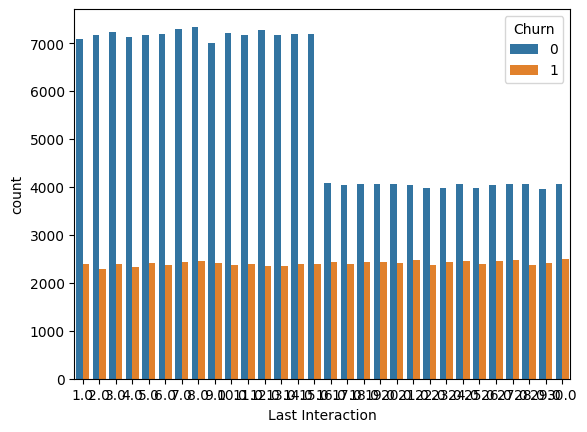

In [23]:
sns.countplot(data=training_data, x="Last Interaction", hue="Churn")
plt.show()

In [7]:
training_data['Support Calls'].mean()

np.float64(3.0941891767065623)

In [27]:
# Split the dataset into features and target
X = training_data[['Support Calls', 'Total Spend', 'Usage Frequency', 'Age', 'Contract Length', 'Last Interaction']]
X = pd.get_dummies(X, drop_first=False)  # Convert categorical variable (Race) to dummy variables
y = training_data['Churn']
X

,Support Calls,Total Spend,Usage Frequency,Age,Last Interaction,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,2,890.21,26,34,30.0,False,False,True
1,2,954.37,22,30,30.0,True,False,False
2,2,674.00,14,23,21.0,True,False,False
3,2,775.00,21,24,18.0,False,False,True
4,1,679.45,26,26,14.0,False,False,True
...,...,...,...,...,...,...,...,...
303119,7,347.58,25,27,28.0,False,False,True
303120,2,855.69,14,40,21.0,False,False,True
303121,6,459.00,21,47,14.0,False,False,True
303122,2,872.00,12,34,12.0,False,True,False


In [28]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (242499, 8)
Testing data: (60625, 8)


In [29]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=123)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Display accuracy and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8778391752577319
F1-score: 0.8125063291139241
Confusion Matrix:
[[37172  5289]
 [ 2117 16047]]


In [36]:
TEST_data = pd.read_csv('test.csv')
ids = TEST_data['CustomerID']
TEST_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,262106,65,Male,16.0,16,3,14,Standard,Monthly,853.00,4.0,06-21,07-05,active
1,37061,23,Male,NaN,12,3,6,Premium,Annual,860.00,21.0,06-03,06-09,active
2,361832,49,Male,NaN,25,2,4,Premium,Quarterly,905.58,15.0,06-13,06-17,active
3,425516,25,Female,48.0,11,7,16,Premium,Quarterly,446.00,8.0,06-14,06-30,active
4,60597,52,Female,4.0,10,6,3,Basic,Monthly,933.29,28.0,06-17,06-20,active


In [31]:
TEST_data = TEST_data.replace("none", np.nan)
TEST_data['Support Calls'] = TEST_data['Support Calls'].fillna(2)
TEST_data['Support Calls'] = TEST_data['Support Calls'].astype(int)

In [33]:
TEST_data['Last Interaction'] = TEST_data['Last Interaction'].fillna(15.0)

In [34]:
# Split the dataset into features and target
testing = TEST_data[['Support Calls', 'Total Spend', 'Usage Frequency', 'Age', 'Contract Length', 'Last Interaction']]
t = pd.get_dummies(testing, drop_first=False)  # Convert categorical variable (Race) to dummy variables

In [35]:
array = clf.predict_proba(t)
array

array([[0.13, 0.87],
       [0.38, 0.62],
       [0.98, 0.02],
       ...,
       [0.27, 0.73],
       [0.31, 0.69],
       [0.88, 0.12]], shape=(133776, 2))

In [37]:
Tdf = pd.DataFrame({
    "CustomerID": ids,
    "Churn": array[:,1]}
)
Tdf.head()

,CustomerID,Churn
0,262106,0.87
1,37061,0.62
2,361832,0.02
3,425516,0.86
4,60597,0.92


In [38]:
Tdf.shape

(133776, 2)

In [39]:
Tdf.to_csv('Test_5.csv', index=False)